In [82]:
import pandas as pd
import os
pd.set_option('display.max_columns', None)
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [29]:
base_path = '/home1/yongpeng/meituan_data/'

# waybill
waybill = pd.read_csv(os.path.join(base_path, 'all_waybill_info_meituan_0322.csv'))
time_cols = ['platform_order_time', 'order_push_time', 'dispatch_time', 'estimate_meal_prepare_time', 'estimate_arrived_time', 'grab_time', 'fetch_time', 'arrive_time']
for t_col in time_cols:
    waybill[t_col] = pd.to_datetime(waybill[t_col], unit='s')

waybill = waybill.sort_values(by=['courier_id','dispatch_time', 'order_id'])

# courier
courier = pd.read_csv(os.path.join(base_path, 'courier_wave_info_meituan.csv'))
for t_col in ['wave_start_time', 'wave_end_time']:
    courier[t_col] = pd.to_datetime(courier[t_col], unit='s')
    
# rider
rider = pd.read_csv(os.path.join(base_path, 'dispatch_rider_meituan.csv'))
rider['dispatch_time'] = pd.to_datetime(rider['dispatch_time'], unit='s')

# orders
orders = pd.read_csv(os.path.join(base_path, 'dispatch_waybill_meituan.csv'))
orders['dispatch_time'] = pd.to_datetime(orders['dispatch_time'], unit='s')

# Order Information

### Order Example
- Each order may have 1 or more waybills, where a waybill_id is a unique id for each (order_id, courier_id) pair. If order_id is accepted by first assigned courier, then only one waybill_id, otherwise multiple waybill_ids incidate an order was previously rejected/not able to be assigned to courier until the last waybill_id was accepted

Basic Order Info ID

In [18]:
waybill.loc[waybill.order_id == 3239, ['dt','order_id', 'waybill_id','courier_id', 'poi_id', 'is_courier_grabbed', 'is_prebook', 'is_weekend']]

,dt,order_id,waybill_id,courier_id,poi_id,is_courier_grabbed,is_prebook,is_weekend
3243,20221017,3239,3243,1881,1491,0,0,0
202802,20221017,3239,202802,4074,1491,0,0,0
526896,20221017,3239,526896,705,1491,1,0,0


Order Time Info

In [21]:
waybill.loc[waybill.order_id == 3239, ['dt','order_id'] + time_cols]

,dt,order_id,platform_order_time,order_push_time,dispatch_time,estimate_meal_prepare_time,estimate_arrived_time,grab_time,fetch_time,arrive_time
3243,20221017,3239,2022-10-17 03:37:57,2022-10-17 03:38:13,2022-10-17 03:38:20,2022-10-17 03:50:13,2022-10-17 04:11:15,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00
202802,20221017,3239,2022-10-17 03:37:57,2022-10-17 03:38:13,2022-10-17 03:39:21,2022-10-17 03:50:13,2022-10-17 04:11:15,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00
526896,20221017,3239,2022-10-17 03:37:57,2022-10-17 03:38:13,2022-10-17 03:39:50,2022-10-17 03:50:13,2022-10-17 04:11:15,2022-10-17 03:43:44,2022-10-17 03:56:22,2022-10-17 04:03:57


Geo Info

In [16]:
waybill.loc[waybill.order_id == 3239, ['dt','order_id', 'courier_id', 'sender_lat','sender_lng', 'recipient_lat', 'recipient_lng', 'grab_lat', 'grab_lng']]

,dt,order_id,courier_id,sender_lat,sender_lng,recipient_lat,recipient_lng,grab_lat,grab_lng
3243,20221017,3239,1881,45863533,174577579,45865558,174577790,0,0
202802,20221017,3239,4074,45863533,174577579,45865558,174577790,0,0
526896,20221017,3239,705,45863533,174577579,45865558,174577790,45860986,174564114


### Courier Perspective

In [30]:
waybill[(waybill.courier_id == 705)&(waybill.dt==20221017)&(waybill.is_courier_grabbed == 1)].sort_values(by='platform_order_time')

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time
307822,307822,20221017,284829,307822,705,0,1,0,2022-10-17 03:40:00,1,870,174566798,45849895,174577047,45862162,174564592,45850876,2022-10-17 02:55:47,2022-10-17 02:56:21,2022-10-17 03:20:45,2022-10-17 03:32:19,2022-10-17 01:32:17,2022-10-17 01:16:17,2022-10-17 01:16:13
265287,265287,20221017,227311,265287,705,0,1,0,2022-10-17 03:50:00,1,226,174566661,45849548,174564109,45860788,174564637,45850798,2022-10-17 03:09:49,2022-10-17 03:09:56,2022-10-17 03:19:56,2022-10-17 03:42:50,2022-10-17 03:11:26,2022-10-17 02:57:26,2022-10-17 02:56:37
507469,507469,20221017,35391,507469,705,0,1,0,2022-10-17 04:35:11,0,1491,174577579,45863533,174582211,45869225,174564114,45860986,2022-10-17 03:39:50,2022-10-17 03:43:44,2022-10-17 03:56:24,2022-10-17 04:17:16,2022-10-17 03:50:13,2022-10-17 03:38:13,2022-10-17 03:31:23
526896,526896,20221017,3239,526896,705,0,1,0,2022-10-17 04:11:15,0,1491,174577579,45863533,174577790,45865558,174564114,45860986,2022-10-17 03:39:50,2022-10-17 03:43:44,2022-10-17 03:56:22,2022-10-17 04:03:57,2022-10-17 03:50:13,2022-10-17 03:38:13,2022-10-17 03:37:57
494380,494380,20221017,441037,494380,705,0,1,0,2022-10-17 04:44:06,0,659,174580827,45864785,174567244,45856972,174580065,45869590,2022-10-17 04:10:21,2022-10-17 04:10:33,2022-10-17 04:25:47,2022-10-17 04:47:13,2022-10-17 04:18:06,2022-10-17 04:01:06,2022-10-17 04:00:57
215896,215896,20221017,203788,215896,705,0,1,0,2022-10-17 05:03:16,0,473,174579382,45863320,174560822,45849139,174580281,45863851,2022-10-17 04:26:48,2022-10-17 04:27:11,2022-10-17 04:37:44,2022-10-17 04:59:40,2022-10-17 04:33:17,2022-10-17 04:12:17,2022-10-17 04:12:07


# Courier Info
Doesn't seem too useful for project

Each entry is a wave, in which courier starts, does orders, and finishes delivering orders

In [28]:
courier[(courier.courier_id == 705)&(courier.dt == 20221017)]

,dt,courier_id,wave_id,wave_start_time,wave_end_time,order_ids
5818,20221017,705,1,2022-10-17 02:56:21,2022-10-17 03:42:50,"[284829, 227311]"
5819,20221017,705,2,2022-10-17 03:43:44,2022-10-17 04:59:40,"[3239, 203788, 441037, 35391]"


# Assignment Inputs

## Orders to be assigned at Dispatch Time

Dispatch Time is not actually assigned time, but time checkpointed for courier to make decision

In [95]:
orders.order_id.nunique(), len(orders)

(15921, 15921)

In [94]:
orders[orders.order_id == 456870]

,Unnamed: 0,dt,dispatch_time,order_id
1069,1069,20221017,2022-10-17 03:27:14,456870


In [96]:
waybill[waybill.order_id == 456870]

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time
513838,513838,20221017,456870,513838,2518,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
595247,595247,20221017,456870,595247,4088,5,1,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,174569395,45899454,2022-10-17 03:31:50,2022-10-17 03:32:02,2022-10-17 03:40:42,2022-10-17 04:10:52,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
621583,621583,20221017,456870,621583,3537,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:29:20,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22


In [110]:
orders.groupby('dispatch_time').size()

dispatch_time
2022-10-17 03:25:14    658
2022-10-17 03:27:14    624
2022-10-17 03:30:14    634
2022-10-18 03:25:06    710
2022-10-18 03:27:06    645
2022-10-18 03:30:06    615
2022-10-19 03:25:13    715
2022-10-19 03:27:13    721
2022-10-19 03:30:13    638
2022-10-20 03:25:12    643
2022-10-20 03:27:12    687
2022-10-20 03:30:12    691
2022-10-21 03:25:07    733
2022-10-21 03:27:07    684
2022-10-21 03:30:07    663
2022-10-22 03:25:10    700
2022-10-22 03:27:10    672
2022-10-22 03:30:10    634
2022-10-23 03:25:19    634
2022-10-23 03:27:19    591
2022-10-23 03:30:19    669
2022-10-24 03:25:17    650
2022-10-24 03:27:17    702
2022-10-24 03:30:17    608
dtype: int64

In [82]:
temp_orders = waybill
temp_orders = temp_orders.rename(columns={'dispatch_time':'waybill_dispatch_time'})
temp_orders = temp_orders.merge(orders[['order_id','dispatch_time']], on='order_id', how='left')

In [76]:
orders[(orders.dispatch_time == '2022-10-17 03:27:14')]

,Unnamed: 0,dt,dispatch_time,order_id
658,658,20221017,2022-10-17 03:27:14,149995
659,659,20221017,2022-10-17 03:27:14,194877
660,660,20221017,2022-10-17 03:27:14,110599
661,661,20221017,2022-10-17 03:27:14,35356
662,662,20221017,2022-10-17 03:27:14,403620
...,...,...,...,...
1277,1277,20221017,2022-10-17 03:27:14,459494
1278,1278,20221017,2022-10-17 03:27:14,3224
1279,1279,20221017,2022-10-17 03:27:14,147014
1280,1280,20221017,2022-10-17 03:27:14,28948


In [77]:
orders.dispatch_time.unique()

<DatetimeArray>
['2022-10-17 03:25:14', '2022-10-17 03:27:14', '2022-10-17 03:30:14',
 '2022-10-18 03:25:06', '2022-10-18 03:27:06', '2022-10-18 03:30:06',
 '2022-10-19 03:25:13', '2022-10-19 03:27:13', '2022-10-19 03:30:13',
 '2022-10-20 03:25:12', '2022-10-20 03:27:12', '2022-10-20 03:30:12',
 '2022-10-21 03:25:07', '2022-10-21 03:27:07', '2022-10-21 03:30:07',
 '2022-10-22 03:25:10', '2022-10-22 03:27:10', '2022-10-22 03:30:10',
 '2022-10-23 03:25:19', '2022-10-23 03:27:19', '2022-10-23 03:30:19',
 '2022-10-24 03:25:17', '2022-10-24 03:27:17', '2022-10-24 03:30:17']
Length: 24, dtype: datetime64[ns]

In [93]:
temp_orders[(temp_orders.dispatch_time == '2022-10-17 03:27:14') & (temp_orders.order_id.duplicated(keep=False)) ].sort_values(by=['order_id','is_courier_grabbed','waybill_dispatch_time'])[['order_id','courier_id','is_courier_grabbed','platform_order_time', 'order_push_time', 'dispatch_time','waybill_dispatch_time','grab_time']]

,order_id,courier_id,is_courier_grabbed,platform_order_time,order_push_time,dispatch_time,waybill_dispatch_time,grab_time
81794,99,835,0,2022-10-17 03:22:26,2022-10-17 03:22:32,2022-10-17 03:27:14,2022-10-17 03:28:51,1970-01-01 00:00:00
99,99,92,1,2022-10-17 03:22:26,2022-10-17 03:22:32,2022-10-17 03:27:14,2022-10-17 03:29:20,2022-10-17 03:29:31
419137,107,4036,0,2022-10-17 03:25:21,2022-10-17 03:26:44,2022-10-17 03:27:14,2022-10-17 03:29:49,1970-01-01 00:00:00
468178,107,4429,0,2022-10-17 03:25:21,2022-10-17 03:26:44,2022-10-17 03:27:14,2022-10-17 03:30:50,1970-01-01 00:00:00
350389,107,274,0,2022-10-17 03:25:21,2022-10-17 03:26:44,2022-10-17 03:27:14,2022-10-17 03:31:21,1970-01-01 00:00:00
...,...,...,...,...,...,...,...,...
494316,440991,1056,0,2022-10-17 03:19:53,2022-10-17 03:20:09,2022-10-17 03:27:14,2022-10-17 03:28:21,1970-01-01 00:00:00
559311,440991,3176,1,2022-10-17 03:19:53,2022-10-17 03:20:09,2022-10-17 03:27:14,2022-10-17 03:29:20,2022-10-17 03:33:04
621583,456870,3537,0,2022-10-17 03:26:22,2022-10-17 03:26:44,2022-10-17 03:27:14,2022-10-17 03:29:20,1970-01-01 00:00:00
513838,456870,2518,0,2022-10-17 03:26:22,2022-10-17 03:26:44,2022-10-17 03:27:14,2022-10-17 03:30:50,1970-01-01 00:00:00


### Compare Plots of Actual Orders to Orders to be Assigned

In [65]:
temp_orders[temp_orders.dt == 20221017]

,order_id,courier_id,dt,platform_order_time,waybill_dispatch_time,dispatch_time
0,1,1,20221017,2022-10-16 15:59:55,2022-10-16 16:12:14,NaT
1,2,2,20221017,2022-10-16 16:18:17,2022-10-16 16:24:44,NaT
2,3,3,20221017,2022-10-16 16:17:08,2022-10-16 16:23:14,NaT
3,4,4,20221017,2022-10-16 16:18:12,2022-10-16 16:23:14,NaT
4,5,5,20221017,2022-10-16 16:39:59,2022-10-16 16:45:27,NaT
...,...,...,...,...,...,...
566001,566288,11,20221017,2022-10-17 15:09:43,2022-10-17 15:11:15,NaT
566002,543190,954,20221017,2022-10-17 15:30:51,2022-10-17 15:35:15,NaT
566003,566289,321,20221017,2022-10-17 15:33:06,2022-10-17 15:34:44,NaT
566004,566290,1888,20221017,2022-10-17 15:49:29,2022-10-17 15:50:50,NaT


<Axes: title={'center': 'Number of Unique IDs per Time'}, xlabel='platform_order_time'>

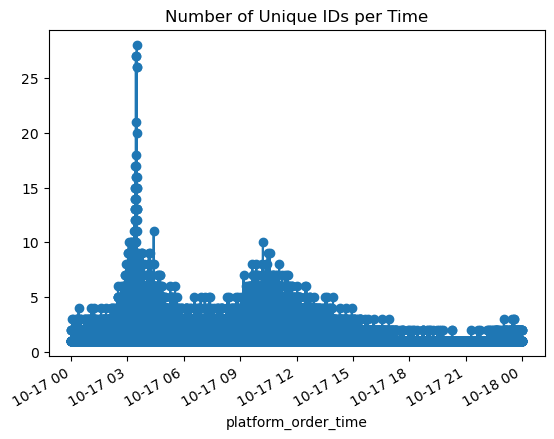

In [72]:
# Group by time and count unique IDs
counts = temp_orders[temp_orders.platform_order_time.dt.date == pd.to_datetime('2022-10-17').date()].groupby('platform_order_time')['order_id'].nunique()

# Plot
counts.plot(kind='line', marker='o', title='Number of Unique IDs per Time')

<Axes: title={'center': 'Number of Unique IDs per Time'}, xlabel='platform_order_time'>

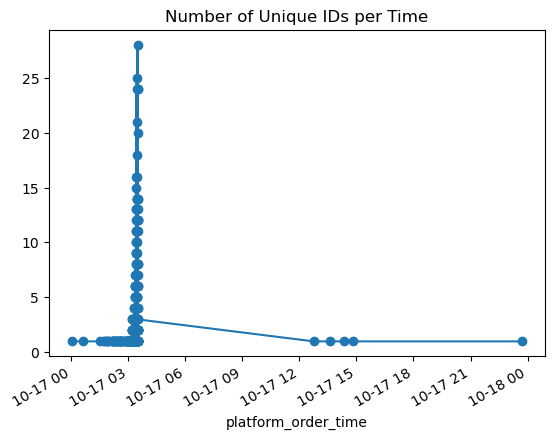

In [73]:

# Group by time and count unique IDs
counts = temp_orders[(temp_orders.platform_order_time.dt.date == pd.to_datetime('2022-10-17').date()) & (~temp_orders.dispatch_time.isna())].groupby('platform_order_time')['order_id'].nunique()

# Plot
counts.plot(kind='line', marker='o', title='Number of Unique IDs per Time')


In [74]:
temp_orders[~temp_orders.dispatch_time.isna()]

,order_id,courier_id,dt,platform_order_time,waybill_dispatch_time,dispatch_time
52,57,52,20221017,2022-10-17 03:00:11,2022-10-17 03:27:21,2022-10-17 03:27:14
73,84,78,20221017,2022-10-17 03:18:16,2022-10-17 03:27:50,2022-10-17 03:27:14
77,89,83,20221017,2022-10-17 03:10:27,2022-10-17 03:25:50,2022-10-17 03:25:14
78,90,84,20221017,2022-10-17 03:19:32,2022-10-17 03:30:50,2022-10-17 03:25:14
79,91,85,20221017,2022-10-17 03:23:56,2022-10-17 03:35:49,2022-10-17 03:30:14
...,...,...,...,...,...,...
568307,568341,2791,20221024,2022-10-24 03:26:37,2022-10-24 03:30:03,2022-10-24 03:27:17
568308,568342,308,20221024,2022-10-24 03:26:20,2022-10-24 03:30:25,2022-10-24 03:27:17
568309,568343,1217,20221024,2022-10-24 03:26:31,2022-10-24 03:30:52,2022-10-24 03:30:17
568311,429929,2467,20221024,2022-10-24 03:20:42,2022-10-24 03:31:23,2022-10-24 03:30:17


Eligible Riders

In [75]:
rider[(rider.dispatch_time == '2022-10-17 03:27:14')]

,Unnamed: 0,dt,rider_lat,rider_lng,dispatch_time,courier_waybills,courier_id
2503,2505,20221017,45895970,174555883,2022-10-17 03:27:14,[],2311
2504,2506,20221017,45867684,174574261,2022-10-17 03:27:14,"[41732, 550645, 312997]",491
2505,2507,20221017,45895850,174571516,2022-10-17 03:27:14,"[346079, 227327, 506430]",1349
2506,2508,20221017,45896202,174554777,2022-10-17 03:27:14,"[414307, 532605, 566056, 168116, 315748]",1595
2507,2509,20221017,45900569,174544374,2022-10-17 03:27:14,"[522071, 224376, 64, 334957]",4641
...,...,...,...,...,...,...,...
5055,5059,20221017,45885469,174583081,2022-10-17 03:27:14,[],2860
5056,5060,20221017,45890105,174552830,2022-10-17 03:27:14,[],3557
5057,5061,20221017,45885406,174583082,2022-10-17 03:27:14,[],1482
5058,5062,20221017,45895284,174549653,2022-10-17 03:27:14,[],693


In [113]:
waybill[(waybill.courier_id == 2518) & (waybill.dt == 20221017)].sort_values('dispatch_time')

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time
150170,150170,20221017,67185,150170,2518,5,0,0,2022-10-17 04:22:02,0,2912,174566097,45898382,174594496,45891351,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:39:06,2022-10-17 03:26:44,2022-10-17 03:18:58
513838,513838,20221017,456870,513838,2518,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
242266,242266,20221017,122673,242266,2518,5,0,0,2022-10-17 04:26:59,0,15,174565946,45898786,174593375,45891546,0,0,2022-10-17 03:33:20,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:43:00,2022-10-17 03:29:00,2022-10-17 03:28:58
608509,608509,20221017,532628,608509,2518,5,1,0,2022-10-17 04:43:00,0,581,174555834,45895612,174570595,45921490,174559907,45895573,2022-10-17 04:05:49,2022-10-17 04:05:52,2022-10-17 04:10:55,2022-10-17 04:31:09,2022-10-17 04:13:01,2022-10-17 04:03:01,2022-10-17 04:02:59
605278,605278,20221017,530080,605278,2518,5,1,0,2022-10-17 08:36:22,0,33,174555690,45896150,174579391,45876658,174555793,45895994,2022-10-17 08:02:45,2022-10-17 08:02:48,2022-10-17 08:04:00,2022-10-17 08:19:48,2022-10-17 08:11:23,2022-10-17 07:56:24,2022-10-17 07:56:08


In [107]:
waybill[(waybill.order_id == 456870)]

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time
513838,513838,20221017,456870,513838,2518,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
595247,595247,20221017,456870,595247,4088,5,1,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,174569395,45899454,2022-10-17 03:31:50,2022-10-17 03:32:02,2022-10-17 03:40:42,2022-10-17 04:10:52,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
621583,621583,20221017,456870,621583,3537,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:29:20,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22


In [99]:
courier[(courier.courier_id.isin([2518, 4088, 3537]))]

,dt,courier_id,wave_id,wave_start_time,wave_end_time,order_ids
17399,20221017,2518,1,2022-10-17 04:05:52,2022-10-17 04:31:09,[532628]
17400,20221017,2518,2,2022-10-17 08:02:48,2022-10-17 08:19:48,[530080]
22156,20221017,3537,1,2022-10-17 02:56:00,2022-10-17 03:21:52,"[63964, 381812, 548069]"
22157,20221017,3537,2,2022-10-17 03:33:01,2022-10-17 03:58:26,"[424984, 362760, 365586]"
22158,20221017,3537,3,2022-10-17 04:10:01,2022-10-17 04:35:19,"[403672, 101649, 253404]"
...,...,...,...,...,...,...
205472,20221024,4088,5,2022-10-24 03:31:41,2022-10-24 04:29:38,"[343045, 511399, 79432, 238569, 63610, 22267, ..."
205473,20221024,4088,6,2022-10-24 04:39:02,2022-10-24 05:00:30,"[301396, 38213, 435357]"
205474,20221024,4088,7,2022-10-24 05:17:03,2022-10-24 05:35:40,[516648]
205475,20221024,4088,8,2022-10-24 07:46:53,2022-10-24 08:13:57,[122396]


In [98]:
rider[(rider.dispatch_time == '2022-10-17 03:27:14') & (rider.courier_id.isin([2518, 4088, 3537]))]

,Unnamed: 0,dt,rider_lat,rider_lng,dispatch_time,courier_waybills,courier_id
2694,2696,20221017,45898132,174573490,2022-10-17 03:27:14,[104541],4088
2878,2880,20221017,45895537,174579809,2022-10-17 03:27:14,[365586],3537
3487,3489,20221017,45893067,174566568,2022-10-17 03:27:14,[],2518


In [109]:
rider.groupby('dispatch_time').size()

dispatch_time
2022-10-17 03:25:14    2503
2022-10-17 03:27:14    2557
2022-10-17 03:30:14    2571
2022-10-18 03:25:06    2530
2022-10-18 03:27:06    2570
2022-10-18 03:30:06    2572
2022-10-19 03:25:13    2595
2022-10-19 03:27:13    2636
2022-10-19 03:30:13    2644
2022-10-20 03:25:12    2613
2022-10-20 03:27:12    2677
2022-10-20 03:30:12    2680
2022-10-21 03:25:07    2604
2022-10-21 03:27:07    2653
2022-10-21 03:30:07    2654
2022-10-22 03:25:10    2566
2022-10-22 03:27:10    2607
2022-10-22 03:30:10    2625
2022-10-23 03:25:19    2511
2022-10-23 03:27:19    2549
2022-10-23 03:30:19    2550
2022-10-24 03:25:17    2482
2022-10-24 03:27:17    2539
2022-10-24 03:30:17    2556
dtype: int64

In [78]:
rider.dispatch_time.unique()

<DatetimeArray>
['2022-10-17 03:25:14', '2022-10-17 03:27:14', '2022-10-17 03:30:14',
 '2022-10-18 03:25:06', '2022-10-18 03:27:06', '2022-10-18 03:30:06',
 '2022-10-19 03:25:13', '2022-10-19 03:27:13', '2022-10-19 03:30:13',
 '2022-10-20 03:25:12', '2022-10-20 03:27:12', '2022-10-20 03:30:12',
 '2022-10-21 03:25:07', '2022-10-21 03:27:07', '2022-10-21 03:30:07',
 '2022-10-22 03:25:10', '2022-10-22 03:27:10', '2022-10-22 03:30:10',
 '2022-10-23 03:25:19', '2022-10-23 03:27:19', '2022-10-23 03:30:19',
 '2022-10-24 03:25:17', '2022-10-24 03:27:17', '2022-10-24 03:30:17']
Length: 24, dtype: datetime64[ns]

# Inspecting from Courier Perspective

In [121]:
temp_orders[temp_orders.courier_id == 2518].sort_values(by='dispatch_time').head(20)

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,waybill_dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time,dispatch_time
150170,150170,20221017,67185,150170,2518,5,0,0,2022-10-17 04:22:02,0,2912,174566097,45898382,174594496,45891351,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:39:06,2022-10-17 03:26:44,2022-10-17 03:18:58,2022-10-17 03:27:14
513838,513838,20221017,456870,513838,2518,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22,2022-10-17 03:27:14
445768,445768,20221018,287969,445768,2518,5,0,0,2022-10-18 04:17:11,0,858,174554750,45894980,174579188,45877054,0,0,2022-10-18 03:29:49,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:43:01,2022-10-18 03:26:36,2022-10-18 03:21:48,2022-10-18 03:27:06
579315,579315,20221018,265149,579315,2518,5,0,0,2022-10-18 04:16:06,0,858,174554750,45894980,174579174,45877036,0,0,2022-10-18 03:29:49,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:43:02,2022-10-18 03:26:36,2022-10-18 03:22:56,2022-10-18 03:27:06
553215,553215,20221018,462436,553215,2518,5,0,0,2022-10-18 04:22:51,0,229,174554821,45896190,174580589,45880701,0,0,2022-10-18 03:29:20,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:38:51,2022-10-18 03:26:36,2022-10-18 03:26:26,2022-10-18 03:27:06
239346,239346,20221018,224735,239346,2518,5,1,0,2022-10-18 04:07:50,0,208,174555813,45896070,174579395,45876724,174555643,45896164,2022-10-18 03:28:18,2022-10-18 03:28:26,2022-10-18 03:34:48,2022-10-18 03:58:44,2022-10-18 03:34:52,2022-10-18 03:18:52,2022-10-18 03:18:30,2022-10-18 03:27:06
462001,462001,20221018,276590,462001,2518,5,0,0,2022-10-18 04:18:11,0,858,174554750,45894980,174579188,45877054,0,0,2022-10-18 03:29:49,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:43:02,2022-10-18 03:26:36,2022-10-18 03:25:15,2022-10-18 03:27:06
308258,308258,20221018,285197,308258,2518,5,0,0,2022-10-18 04:17:54,0,1670,174555530,45895728,174570796,45872749,0,0,2022-10-18 03:33:19,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:28:55,2022-10-18 03:28:55,2022-10-18 03:28:52,2022-10-18 03:30:06
256173,256173,20221019,239643,256173,2518,5,0,0,2022-10-19 04:10:10,0,79,174555818,45895620,174593573,45891537,0,0,2022-10-19 03:22:48,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-19 03:30:12,2022-10-19 03:19:13,2022-10-19 03:19:00,2022-10-19 03:25:13
579730,579730,20221019,153801,579730,2518,5,0,0,2022-10-19 04:11:35,0,75,174550193,45898320,174582817,45894330,0,0,2022-10-19 03:22:48,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-19 03:40:31,2022-10-19 03:22:31,2022-10-19 03:17:45,2022-10-19 03:25:13


In [122]:

waybill[waybill.order_id == 532628]

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time
608509,608509,20221017,532628,608509,2518,5,1,0,2022-10-17 04:43:00,0,581,174555834,45895612,174570595,45921490,174559907,45895573,2022-10-17 04:05:49,2022-10-17 04:05:52,2022-10-17 04:10:55,2022-10-17 04:31:09,2022-10-17 04:13:01,2022-10-17 04:03:01,2022-10-17 04:02:59


In [123]:
waybill[waybill.courier_id == 2518].sort_values(by='dispatch_time').head(20)

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time
513838,513838,20221017,456870,513838,2518,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
150170,150170,20221017,67185,150170,2518,5,0,0,2022-10-17 04:22:02,0,2912,174566097,45898382,174594496,45891351,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:39:06,2022-10-17 03:26:44,2022-10-17 03:18:58
242266,242266,20221017,122673,242266,2518,5,0,0,2022-10-17 04:26:59,0,15,174565946,45898786,174593375,45891546,0,0,2022-10-17 03:33:20,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:43:00,2022-10-17 03:29:00,2022-10-17 03:28:58
608509,608509,20221017,532628,608509,2518,5,1,0,2022-10-17 04:43:00,0,581,174555834,45895612,174570595,45921490,174559907,45895573,2022-10-17 04:05:49,2022-10-17 04:05:52,2022-10-17 04:10:55,2022-10-17 04:31:09,2022-10-17 04:13:01,2022-10-17 04:03:01,2022-10-17 04:02:59
605278,605278,20221017,530080,605278,2518,5,1,0,2022-10-17 08:36:22,0,33,174555690,45896150,174579391,45876658,174555793,45895994,2022-10-17 08:02:45,2022-10-17 08:02:48,2022-10-17 08:04:00,2022-10-17 08:19:48,2022-10-17 08:11:23,2022-10-17 07:56:24,2022-10-17 07:56:08
239346,239346,20221018,224735,239346,2518,5,1,0,2022-10-18 04:07:50,0,208,174555813,45896070,174579395,45876724,174555643,45896164,2022-10-18 03:28:18,2022-10-18 03:28:26,2022-10-18 03:34:48,2022-10-18 03:58:44,2022-10-18 03:34:52,2022-10-18 03:18:52,2022-10-18 03:18:30
553215,553215,20221018,462436,553215,2518,5,0,0,2022-10-18 04:22:51,0,229,174554821,45896190,174580589,45880701,0,0,2022-10-18 03:29:20,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:38:51,2022-10-18 03:26:36,2022-10-18 03:26:26
579315,579315,20221018,265149,579315,2518,5,0,0,2022-10-18 04:16:06,0,858,174554750,45894980,174579174,45877036,0,0,2022-10-18 03:29:49,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:43:02,2022-10-18 03:26:36,2022-10-18 03:22:56
462001,462001,20221018,276590,462001,2518,5,0,0,2022-10-18 04:18:11,0,858,174554750,45894980,174579188,45877054,0,0,2022-10-18 03:29:49,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:43:02,2022-10-18 03:26:36,2022-10-18 03:25:15
445768,445768,20221018,287969,445768,2518,5,0,0,2022-10-18 04:17:11,0,858,174554750,45894980,174579188,45877054,0,0,2022-10-18 03:29:49,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-18 03:43:01,2022-10-18 03:26:36,2022-10-18 03:21:48


In [115]:
courier[courier.courier_id == 2518]

,dt,courier_id,wave_id,wave_start_time,wave_end_time,order_ids
17399,20221017,2518,1,2022-10-17 04:05:52,2022-10-17 04:31:09,[532628]
17400,20221017,2518,2,2022-10-17 08:02:48,2022-10-17 08:19:48,[530080]
43134,20221018,2518,1,2022-10-18 03:34:27,2022-10-18 04:00:44,"[224735, 195253, 98791]"
43135,20221018,2518,2,2022-10-18 08:59:19,2022-10-18 09:29:55,"[242336, 530394, 242333]"
43136,20221018,2518,3,2022-10-18 10:12:32,2022-10-18 10:44:12,"[165736, 304958]"
43137,20221018,2518,4,2022-10-18 11:34:50,2022-10-18 11:58:17,[86601]
69343,20221019,2518,1,2022-10-19 03:17:04,2022-10-19 04:43:01,"[396164, 330127, 147764, 535895, 396092]"
95335,20221020,2518,1,2022-10-20 03:35:44,2022-10-20 04:30:08,"[65184, 123750, 302602, 463087, 433951]"
95336,20221020,2518,2,2022-10-20 11:43:24,2022-10-20 12:23:41,[4636]
120823,20221021,2518,1,2022-10-21 02:51:08,2022-10-21 03:14:04,"[145449, 49849]"


In [14]:
rider[(rider['dispatch_time'].between(pd.to_datetime('2022-10-17 03:00:00'), pd.to_datetime('2022-10-17 04:00:00'))) &
        (rider.courier_id == 2518)]

,Unnamed: 0,dt,rider_lat,rider_lng,dispatch_time,courier_waybills,courier_id
1522,1524,20221017,45892952,174566408,2022-10-17 03:25:14,[],2518
3487,3489,20221017,45893067,174566568,2022-10-17 03:27:14,[],2518
5232,5236,20221017,45892899,174566686,2022-10-17 03:30:14,[],2518


# Possible Predict then Optimize Task

In [21]:
rider[(rider['dispatch_time'].between(pd.to_datetime('2022-10-17 03:00:00'), pd.to_datetime('2022-10-17 04:00:00'))) &
        (rider.courier_id == 2518)]

,Unnamed: 0,dt,rider_lat,rider_lng,dispatch_time,courier_waybills,courier_id
1522,1524,20221017,45892952,174566408,2022-10-17 03:25:14,[],2518
3487,3489,20221017,45893067,174566568,2022-10-17 03:27:14,[],2518
5232,5236,20221017,45892899,174566686,2022-10-17 03:30:14,[],2518


In [42]:
courier[(courier.courier_id == 2518)].head()

,dt,courier_id,wave_id,wave_start_time,wave_end_time,order_ids
17399,20221017,2518,1,2022-10-17 04:05:52,2022-10-17 04:31:09,[532628]
17400,20221017,2518,2,2022-10-17 08:02:48,2022-10-17 08:19:48,[530080]
43134,20221018,2518,1,2022-10-18 03:34:27,2022-10-18 04:00:44,"[224735, 195253, 98791]"
43135,20221018,2518,2,2022-10-18 08:59:19,2022-10-18 09:29:55,"[242336, 530394, 242333]"
43136,20221018,2518,3,2022-10-18 10:12:32,2022-10-18 10:44:12,"[165736, 304958]"


In [17]:
waybill_test = waybill[(waybill['dispatch_time'].between(pd.to_datetime('2022-10-17 03:00:00'), pd.to_datetime('2022-10-17 04:00:00'))) &
        (waybill.courier_id == 2518)]
waybill_test

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time
150170,150170,20221017,67185,150170,2518,5,0,0,2022-10-17 04:22:02,0,2912,174566097,45898382,174594496,45891351,0,0,2022-10-17 03:30:50,1970-01-01,1970-01-01,1970-01-01,2022-10-17 03:39:06,2022-10-17 03:26:44,2022-10-17 03:18:58
513838,513838,20221017,456870,513838,2518,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:30:50,1970-01-01,1970-01-01,1970-01-01,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
242266,242266,20221017,122673,242266,2518,5,0,0,2022-10-17 04:26:59,0,15,174565946,45898786,174593375,45891546,0,0,2022-10-17 03:33:20,1970-01-01,1970-01-01,1970-01-01,2022-10-17 03:43:00,2022-10-17 03:29:00,2022-10-17 03:28:58


# Data Area or Next Period Availability

/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore

<Axes: xlabel='grab_lng', ylabel='grab_lat'>

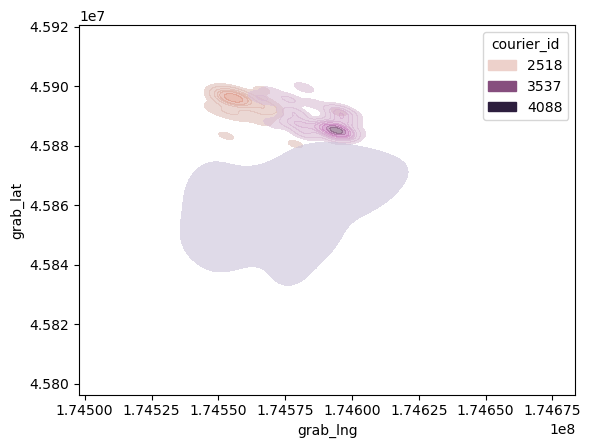

In [57]:
sns.kdeplot(data=waybill[(waybill.courier_id.isin([2518, 4088, 3537])) & (waybill.is_courier_grabbed == 1)], x="grab_lng", y="grab_lat", hue="courier_id", fill=True, alpha=0.6)


/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='grab_lng', ylabel='grab_lat'>

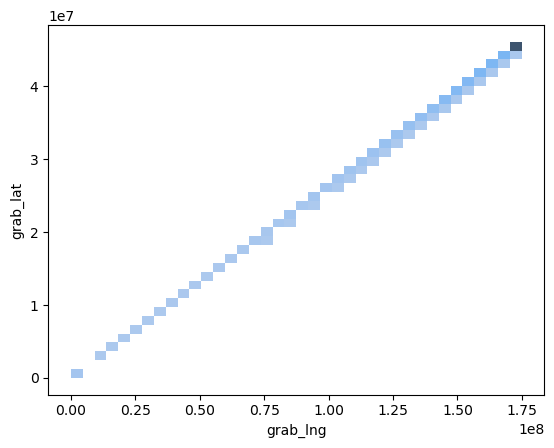

In [63]:
courier_avg_pos = waybill.groupby('courier_id')[["grab_lng", "grab_lat"]].mean()
sns.histplot(data=courier_avg_pos, x="grab_lng", y="grab_lat")


In [90]:
waybill['hour_block'] = waybill['dispatch_time'].dt.floor('h')
waybill['block_10min'] = waybill['dispatch_time'].dt.floor('10min')

In [117]:
waybill.head()

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time,hour_block,block_10min
0,0,20221017,0,0,0,0,0,1,2022-10-16 16:32:58,0,0,174579111,45862631,174600135,45852786,0,0,2022-10-16 16:04:18,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-16 16:12:59,2022-10-16 16:00:00,2022-10-16 15:59:56,2022-10-16 16:00:00,2022-10-16 16:00:00
353538,353538,20221017,194804,353538,0,0,0,0,2022-10-16 17:19:00,0,1655,174561324,45860417,174558781,45886020,0,0,2022-10-16 16:41:44,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-16 16:51:32,2022-10-16 16:41:32,2022-10-16 16:40:50,2022-10-16 16:00:00,2022-10-16 16:40:00
180190,180190,20221017,171478,180190,0,0,1,0,2022-10-17 14:44:13,0,212,174563695,45862995,174594533,45843612,174563904,45861819,2022-10-17 13:59:45,2022-10-17 13:59:59,2022-10-17 14:08:18,2022-10-17 14:20:27,2022-10-17 13:57:13,2022-10-17 13:57:13,2022-10-17 13:57:11,2022-10-17 13:00:00,2022-10-17 13:50:00
366839,366839,20221017,104853,366839,0,0,0,0,2022-10-17 15:06:54,0,318,174578422,45854381,174555049,45877602,0,0,2022-10-17 14:26:15,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 14:32:58,2022-10-17 14:25:58,2022-10-17 14:25:35,2022-10-17 14:00:00,2022-10-17 14:20:00
65566,65566,20221017,64280,65566,0,0,0,0,2022-10-17 15:24:36,0,4010,174578008,45877660,174578023,45846390,0,0,2022-10-17 14:45:15,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 15:02:02,2022-10-17 14:45:02,2022-10-17 14:44:25,2022-10-17 14:00:00,2022-10-17 14:40:00


In [91]:
hour_da_cts = waybill[(waybill.is_courier_grabbed == True) &
                    (waybill.block_10min > pd.to_datetime('1970-01-01 00:00:00'))].groupby(['block_10min','da_id']).size().reset_index().rename(columns={0:'count'})

/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore

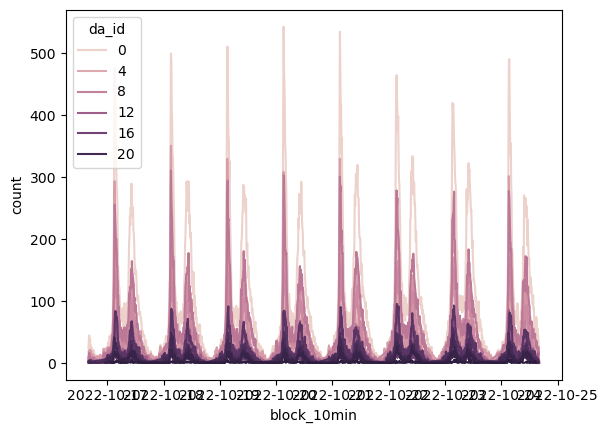

In [94]:
sns.lineplot(data=hour_da_cts, x='block_10min', y='count', hue='da_id')
plt.show()

In [20]:
order_test = orders[orders.order_id.isin(waybill_test.order_id.unique())]

,Unnamed: 0,dt,dispatch_time,order_id
1069,1069,20221017,2022-10-17 03:27:14,456870
1089,1089,20221017,2022-10-17 03:27:14,67185


In [30]:
waybill[waybill.order_id.isin(order_test.order_id.unique())]

,Unnamed: 0,dt,order_id,waybill_id,courier_id,da_id,is_courier_grabbed,is_weekend,estimate_arrived_time,is_prebook,poi_id,sender_lng,sender_lat,recipient_lng,recipient_lat,grab_lng,grab_lat,dispatch_time,grab_time,fetch_time,arrive_time,estimate_meal_prepare_time,order_push_time,platform_order_time
150170,150170,20221017,67185,150170,2518,5,0,0,2022-10-17 04:22:02,0,2912,174566097,45898382,174594496,45891351,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:39:06,2022-10-17 03:26:44,2022-10-17 03:18:58
513838,513838,20221017,456870,513838,2518,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:30:50,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
513836,513836,20221017,67185,513836,3537,5,0,0,2022-10-17 04:22:02,0,2912,174566097,45898382,174594496,45891351,0,0,2022-10-17 03:29:20,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:39:06,2022-10-17 03:26:44,2022-10-17 03:18:58
621583,621583,20221017,456870,621583,3537,5,0,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,0,0,2022-10-17 03:29:20,1970-01-01 00:00:00,1970-01-01 00:00:00,1970-01-01 00:00:00,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22
68575,68575,20221017,67185,68575,4088,5,1,0,2022-10-17 04:22:02,0,2912,174566097,45898382,174594496,45891351,174569395,45899454,2022-10-17 03:31:50,2022-10-17 03:32:02,2022-10-17 03:40:40,2022-10-17 04:18:39,2022-10-17 03:39:06,2022-10-17 03:26:44,2022-10-17 03:18:58
595247,595247,20221017,456870,595247,4088,5,1,0,2022-10-17 04:25:04,0,2912,174566097,45898382,174590412,45885764,174569395,45899454,2022-10-17 03:31:50,2022-10-17 03:32:02,2022-10-17 03:40:42,2022-10-17 04:10:52,2022-10-17 03:40:10,2022-10-17 03:26:44,2022-10-17 03:26:22


# Ranking Loss

In [101]:
courier_cts = waybill.groupby('courier_id')['is_courier_grabbed'].agg(['mean','count']).reset_index()

In [113]:
courier_cts['count'].describe()

count    4955.000000
mean      132.057114
std       107.467865
min         1.000000
25%        44.000000
50%       107.000000
75%       201.000000
max       717.000000
Name: count, dtype: float64

/home1/yongpeng/.conda/envs/pyepo_dsl/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


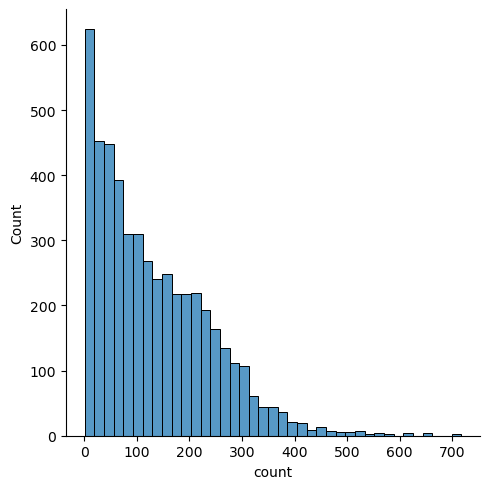

In [112]:
sns.displot(courier_cts['count'])

In [116]:
courier_cts[(courier_cts['count'] > 200)]['mean'].describe()

count    1245.000000
mean        0.887954
std         0.153085
min         0.280423
25%         0.804348
50%         0.983607
75%         1.000000
max         1.000000
Name: mean, dtype: float64

In [38]:
(waybill.groupby('order_id')['courier_id'].count() > 1).mean()

0.1016100720082456